In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

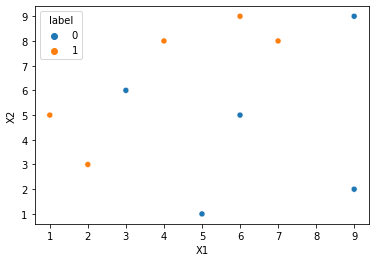

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values


In [11]:
dt1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

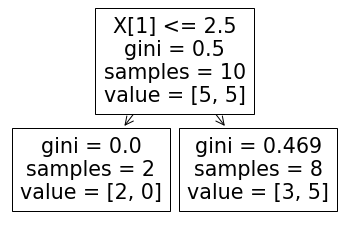

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


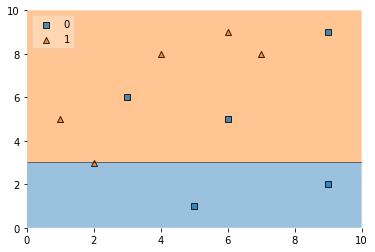

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [17]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [18]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [19]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [20]:

df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [21]:
df['updated_weights'].sum()

0.9165153319682015

In [22]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [23]:

df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [24]:
df['nomalized_weights'].sum()

1.0

In [25]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [26]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [27]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [28]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [29]:
index_values = create_new_dataset(df)

index_values

[0, 0, 6, 1, 0, 2, 8, 3, 6, 3]

In [30]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [31]:
second_df

,X1,X2,label,weights
0,1,5,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1


In [32]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [33]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [34]:
dt2.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 5.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(83.7, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

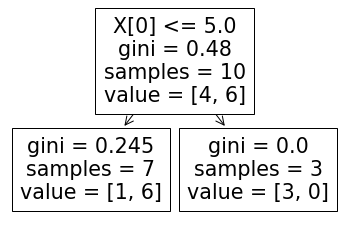

In [35]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


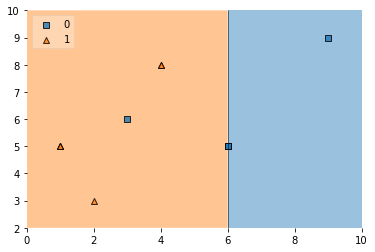

In [36]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [37]:
second_df['y_pred'] = dt2.predict(X)

In [38]:
second_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1
0,1,5,1,0.1,1
2,3,6,0,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1


In [39]:
alpha2 = calculate_model_weight(0.1)

In [40]:
alpha2

1.0986122886681098

In [41]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [42]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [43]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622


In [44]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [45]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034


In [46]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [47]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [48]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [49]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.056034,0.000000,0.056034
0,1,5,1,0.1,1,0.056034,0.056034,0.112068
6,6,5,0,0.1,0,0.056034,0.112068,0.168102
1,2,3,1,0.1,1,0.056034,0.168102,0.224136
0,1,5,1,0.1,1,0.056034,0.224136,0.280170
2,3,6,0,0.1,1,0.495694,0.280170,0.775864
8,9,9,0,0.1,0,0.056034,0.775864,0.831898
3,4,8,1,0.1,1,0.056034,0.831898,0.887932
6,6,5,0,0.1,0,0.056034,0.887932,0.943966
3,4,8,1,0.1,1,0.056034,0.943966,1.000000


In [50]:
index_values = create_new_dataset(second_df)

In [51]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [52]:
third_df

,X1,X2,label,weights
0,1,5,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
0,1,5,1,0.1


In [53]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


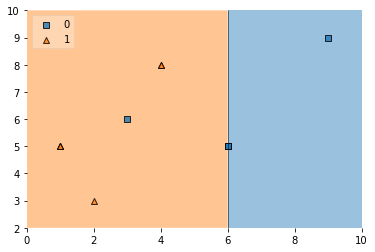

In [54]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [55]:
third_df['y_pred'] = dt3.predict(X)

In [56]:
third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
1,2,3,1,0.1,0
0,1,5,1,0.1,1


In [57]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [58]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [59]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [60]:
dt2.predict(query)

array([1])

In [61]:
dt3.predict(query)

array([1])

In [62]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [63]:
np.sign(1.09)

1.0

In [64]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [65]:
dt2.predict(query)

array([0])

In [66]:
dt3.predict(query)

array([0])

In [67]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [68]:
np.sign(-0.25)

-1.0

In [ ]:
##Both of above predictions are correct

In [ ]:
######################################################################################

In [72]:
import numpy as np


# Decision stump used as weak classifier
class DS:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self, n_clf):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DS()
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    y[y == 0] = -1

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=5
    )
    for i in range(3,6):
    # Adaboost classification with 5 weak classifiers
      clf = Adaboost(i)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      acc = accuracy(y_test, y_pred)
      print("Accuracy with number of {} weak classifiers is {}".format(i,acc))

Accuracy with number of 3 weak classifiers is 0.956140350877193
Accuracy with number of 4 weak classifiers is 0.9649122807017544
Accuracy with number of 5 weak classifiers is 0.9736842105263158
